<a href="https://colab.research.google.com/github/ronsupreme/BaiTH2/blob/main/TH2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression as SKLogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/student.csv', sep=';')

# Define categorical columns to one-hot encode
categorical_to_encode = [
    'Marital status', 'Application mode', 'Course', 'Previous qualification',
    'Nacionality', "Mother's qualification", "Father's qualification",
    "Mother's occupation", "Father's occupation"
]

# One-hot encode categorical variables
data_encoded = pd.get_dummies(data, columns=categorical_to_encode)

data_encoded.head()

# Create targets
# Binary target for Logistic Regression
y_binary = (data['Target'] == 'Graduate').astype(int).values
# Multi-class target for Softmax Regression
y_multi = data['Target'].map({'Graduate': 0, 'Dropout': 1, 'Enrolled': 2}).values

# Features (drop the original target column)
X = data_encoded.drop('Target', axis=1).values

# Split the data into training and testing sets
X_train, X_test, y_train_binary, y_test_binary = train_test_split(
    X, y_binary, test_size=0.2, random_state=42
)
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X, y_multi, test_size=0.2, random_state=42
)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add bias term (column of ones) for NumPy implementations
X_train_scaled = np.hstack((np.ones((X_train_scaled.shape[0], 1)), X_train_scaled))
X_test_scaled = np.hstack((np.ones((X_test_scaled.shape[0], 1)), X_test_scaled))

# **Assignment 1**

Logistic Regression Accuracy: 0.8395


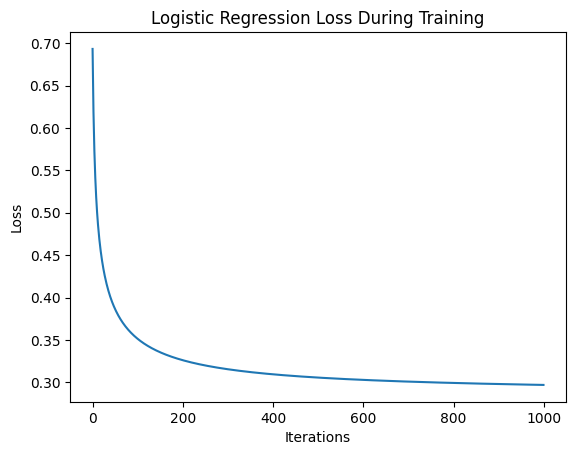

In [ ]:
class LogisticRegression:
    def __init__(self, learning_rate=0.1, num_iterations=1000):
        self.lr = learning_rate
        self.num_iter = num_iterations
        self.weights = None
        self.losses = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        for _ in range(self.num_iter):
            h = self.sigmoid(X @ self.weights)
            gradient = (X.T @ (h - y)) / y.size
            self.weights -= self.lr * gradient
            loss = -np.mean(y * np.log(h + 1e-15) + (1 - y) * np.log(1 - h + 1e-15))
            self.losses.append(loss)

    def predict(self, X):
        prob = self.sigmoid(X @ self.weights)
        return (prob >= 0.5).astype(int)

# Train and evaluate Logistic Regression
lr = LogisticRegression(learning_rate=0.1, num_iterations=1000)
lr.fit(X_train_scaled, y_train_binary)
y_pred_binary = lr.predict(X_test_scaled)
accuracy_binary = accuracy_score(y_test_binary, y_pred_binary)
print(f"Logistic Regression Accuracy: {accuracy_binary:.4f}")

# Visualize loss
plt.plot(lr.losses)
plt.title("Logistic Regression Loss During Training")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

# **Assignment 2**

Softmax Regression Accuracy: 0.7548


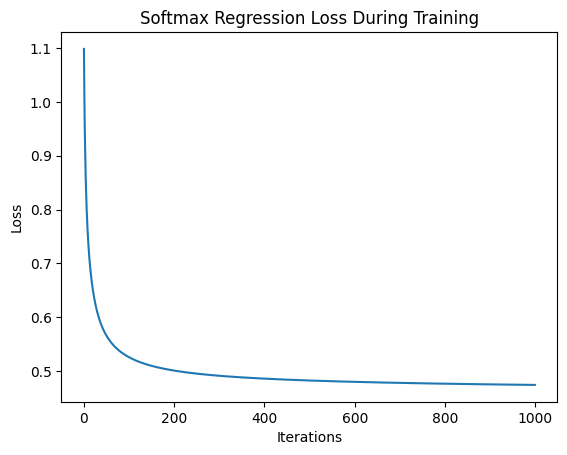

In [ ]:
# Softmax Regression implementation
class SoftmaxRegression:
    def __init__(self, learning_rate=0.1, num_iterations=1000):
        self.lr = learning_rate
        self.num_iter = num_iterations
        self.weights = None
        self.losses = []

    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # Numerical stability
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def fit(self, X, y):
        num_classes = 3  # Graduate, Dropout, Enrolled
        self.weights = np.zeros((X.shape[1], num_classes))
        y_one_hot = np.eye(num_classes)[y]
        for _ in range(self.num_iter):
            h = self.softmax(X @ self.weights)
            gradient = (X.T @ (h - y_one_hot)) / y.size
            self.weights -= self.lr * gradient
            loss = -np.mean(np.sum(y_one_hot * np.log(h + 1e-15), axis=1))
            self.losses.append(loss)

    def predict(self, X):
        h = self.softmax(X @ self.weights)
        return np.argmax(h, axis=1)

# Train and evaluate Softmax Regression
sr = SoftmaxRegression(learning_rate=0.1, num_iterations=1000)
sr.fit(X_train_scaled, y_train_multi)
y_pred_multi = sr.predict(X_test_scaled)
accuracy_multi = accuracy_score(y_test_multi, y_pred_multi)
print(f"Softmax Regression Accuracy: {accuracy_multi:.4f}")

# Visualize loss
plt.plot(sr.losses)
plt.title("Softmax Regression Loss During Training")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

# **Assignment 3**

In [ ]:
# Logistic Regression (Binary)
sk_lr_binary = SKLogisticRegression(max_iter=1000)
sk_lr_binary.fit(X_train_scaled[:, 1:], y_train_binary)  # Exclude bias column
y_pred_sk_binary = sk_lr_binary.predict(X_test_scaled[:, 1:])
accuracy_sk_binary = accuracy_score(y_test_binary, y_pred_sk_binary)
print(f"Scikit-Learn Logistic Regression Accuracy: {accuracy_sk_binary:.4f}")

# Softmax Regression (Multi-Class)
sk_lr_multi = SKLogisticRegression(max_iter=1000)
sk_lr_multi.fit(X_train_scaled[:, 1:], y_train_multi)
y_pred_sk_multi = sk_lr_multi.predict(X_test_scaled[:, 1:])
accuracy_sk_multi = accuracy_score(y_test_multi, y_pred_sk_multi)
print(f"Scikit-Learn Softmax Regression Accuracy: {accuracy_sk_multi:.4f}")

Scikit-Learn Logistic Regression Accuracy: 0.8463
Scikit-Learn Softmax Regression Accuracy: 0.7503


# **Đánh giá kết quả**

**1.Tiền xử lý dữ liệu:**

Load data với sep=';' để khớp với định dạng phân cách bằng dấu chấm phẩy.

Các biến phân loại được mã hóa one-hot bằng pd.get_dummies, làm tăng chiều của đặc trưng nhưng đảm bảo tất cả dữ liệu đều ở dạng số.

Binary target (y_binary) được tạo bằng cách ánh xạ "Graduate" = 1 và "Dropout" hoặc "Enrolled" = 0.

Multi target (y_multi) ánh xạ ba lớp thành các số nguyên cho Regression Softmax.

Đặc trưng được chuẩn hóa bằng StandardScaler, và một cột hệ số chặn được thêm vào cho các triển khai NumPy.

**2.Bài tập 1: Logistic Regression với NumPy:**

Mô hình: Sử dụng hàm sigmoid để dự đoán xác suất và hàm mất mát cross-entropy binary.

*Kết quả: Logistic Regression Accuracy: 0.8395*

**3.Bài tập 2: Softmax Regression với NumPy:**

Mô hình: Sử dụng hàm softmax cho xác suất đa lớp và hàm mất mát cross-entropy.

*Kết quả: Softmax Regression Accuracy: 0.7548*

**4.Bài tập 3: Mô hình Scikit-Learn:**

*Scikit-Learn Logistic Regression Accuracy: 0.8463*

*Scikit-Learn Softmax Regression Accuracy: 0.7503*

**5.Đánh giá:**

*a.Logistic Regression (Binary: Graduate vs Non-Graduate)*

NumPy (0.8395) vs Scikit-Learn (0.8463):

Mô hình Scikit-Learn vượt trội hơn một chút so với triển khai NumPy, với độ chính xác cao hơn 0.0068 (0.68%).

Sự khác biệt nhỏ này cho thấy triển khai NumPy hoạt động khá tốt, gần đạt hiệu suất của Scikit-Learn, vốn sử dụng các thuật toán tối ưu hóa tiên tiến (như L-BFGS hoặc SAG).

Mô hình nhị phân đạt độ chính xác cao (trên 83%), cho thấy khả năng phân biệt tốt giữa "Graduate" và "Non-Graduate" (kết hợp "Dropout" và "Enrolled").

*b. Softmax Regression (Multi-class: Graduate, Dropout, Enrolled)*

NumPy (0.7548) vs Scikit-Learn (0.7503):

Triển khai NumPy có độ chính xác cao hơn một chút so với Scikit-Learn, với chênh lệch 0.0045 (0.45%).

Sự khác biệt này rất nhỏ và có thể do cách khởi tạo trọng số, tốc độ học, hoặc sự hội tụ ngẫu nhiên trong quá trình huấn luyện. Cả hai mô hình đều có hiệu suất tương đương trong thực tế.

Độ chính xác thấp hơn so với các mô hình nhị phân (khoảng 75%) là điều dễ hiểu, vì phân loại đa lớp phức tạp hơn với ba lớp thay vì hai, dẫn đến khả năng dự đoán sai cao hơn.

*c. Đánh giá tổng quan:*

Hiệu suất tốt nhất: Hồi quy Logistic Scikit-Learn (0.8463) là mô hình có độ chính xác cao nhất, phù hợp nếu mục tiêu là dự đoán nhị phân (Graduate vs Non-Graduate).

Hiệu suất đa lớp: Hồi quy Softmax NumPy (0.7548) hơn chút trong phân loại đa lớp, nhưng cả hai mô hình Softmax đều có độ chính xác tương đối thấp (~75%), cho thấy có thể cần cải thiện thêm để phân biệt tốt hơn giữa ba lớp.

Triển khai NumPy so với Scikit-Learn: Các mô hình NumPy tự xây dựng có hiệu suất rất gần với Scikit-Learn, chứng minh rằng việc triển khai thủ công là đáng tin cậy, dù Scikit-Learn có ưu thế nhỏ nhờ tối ưu hóa.